<a href="https://colab.research.google.com/github/maskot1977/PythonCourse2019/blob/master/RNN_f_long.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 関数の定義

In [0]:
import numpy as np

def f(t, freq=100):
    return np.sin(2. * np.pi * t / freq)

def g(t, freq=100, amp=10, threshold = 10):
    return 1/(1 + np.exp(10 * np.sin(2 * np.pi * t / freq) + 10))

def h(t, freqs=[11, 23, 31, 41, 53, 61, 71, 83, 97]):
    value = np.zeros_like(t)
    for freq in freqs:
        value += f(t, freq)
    return value

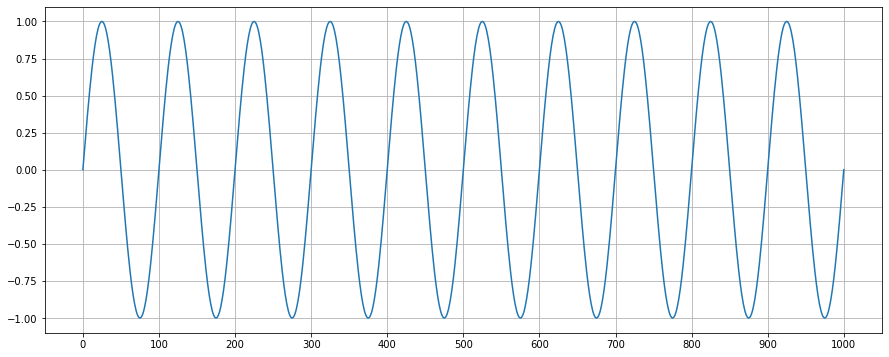

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

total_time_length = 1000
times = np.linspace(0, total_time_length, total_time_length + 1)

plt.figure(figsize=(15, 6))
plt.plot(f(times))
plt.xticks(np.linspace(0, 1000, 11))
plt.grid()

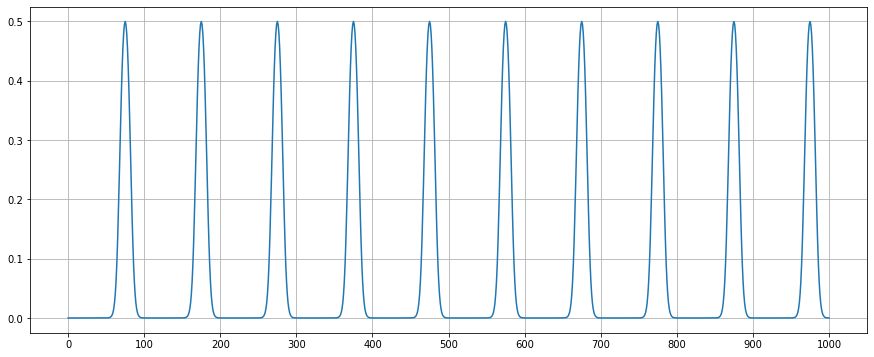

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

total_time_length = 1000
times = np.linspace(0, total_time_length, total_time_length + 1)

plt.figure(figsize=(15, 6))
plt.plot(g(times))
plt.xticks(np.linspace(0, 1000, 11))
plt.grid()

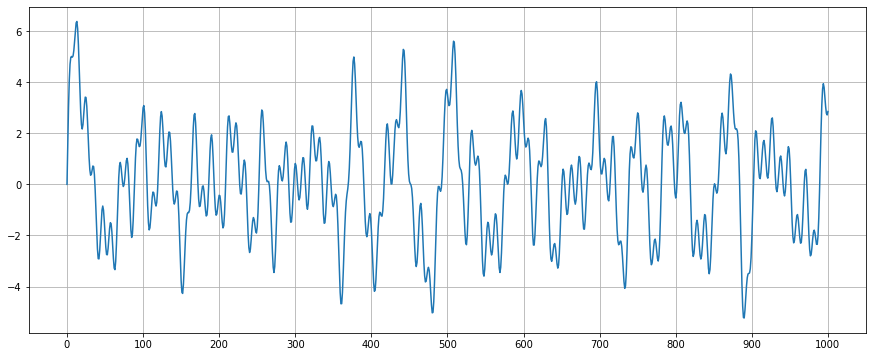

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

total_time_length = 1000
times = np.linspace(0, total_time_length, total_time_length + 1)

plt.figure(figsize=(15, 6))
plt.plot(h(times))
plt.xticks(np.linspace(0, 1000, 11))
plt.grid()

# 関数のフーリエ変換

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


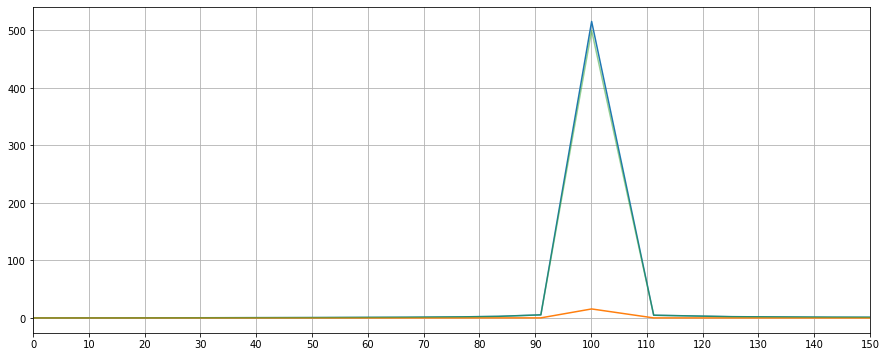

In [0]:
sp = np.fft.fft(f(times))
freq = np.fft.fftfreq(times.shape[-1])
plt.figure(figsize=(15, 6))
plt.plot(1/freq, abs(sp.real) + abs(sp.imag))
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


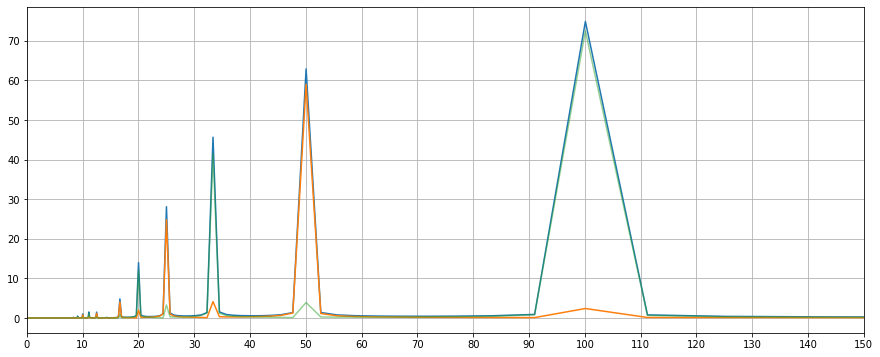

In [0]:
sp = np.fft.fft(g(times))
freq = np.fft.fftfreq(times.shape[-1])
plt.figure(figsize=(15, 6))
plt.plot(1/freq, abs(sp.real) + abs(sp.imag))
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


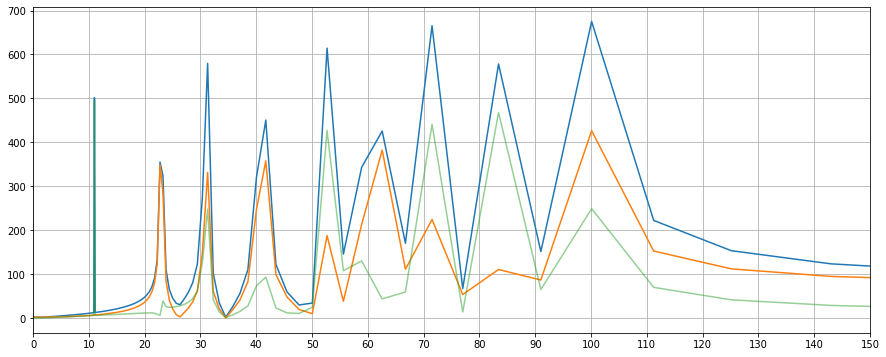

In [0]:
sp = np.fft.fft(h(times))
freq = np.fft.fftfreq(times.shape[-1])
plt.figure(figsize=(15, 6))
plt.plot(1/freq, abs(sp.real) + abs(sp.imag))
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

# 時系列データセットの作成

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

func = f

total_time_length = 10000
pred_length = 1000
learning_time_length = 100
time_series_T = np.linspace(0, total_time_length, total_time_length + 1)
time_series_X = func(time_series_T)

X_learn = []
Y_learn = []
for i in range(total_time_length - learning_time_length):
    X_learn.append(time_series_X[i:i+learning_time_length].reshape(1, learning_time_length).T)
    Y_learn.append([time_series_X[i+learning_time_length]])

X_train, X_val, Y_train, Y_val = \
train_test_split(X_learn, Y_learn, test_size=0.2, shuffle=False)

X_train2sklearn = [list(x.reshape(1, len(x))[0]) for x in X_train]
Y_train2sklearn = [y[0] for y in Y_train]

# 多層パーセプトロン(scikit-learn)

In [0]:
%%time
from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor(hidden_layer_sizes=(100, 100, 100), 
                         early_stopping=True, max_iter=10000) # 回帰器の生成
regressor.fit(X_train2sklearn, Y_train2sklearn) # 学習

CPU times: user 2.99 s, sys: 1.4 s, total: 4.39 s
Wall time: 2.27 s


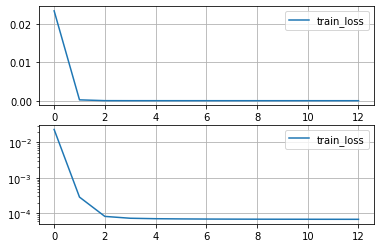

In [0]:
plt.plot(regressor.loss_curve_)
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(211)
plt.plot(regressor.loss_curve_, label='train_loss')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(regressor.loss_curve_, label='train_loss')
plt.yscale('log')
plt.legend()
plt.grid()

In [0]:
%%time
pred_length = 1000
X_pred_length = np.linspace(0, pred_length , pred_length + 1)
Y_observed = func(X_pred_length)
Y_pred = Y_observed[:learning_time_length+1]

for i in range(pred_length):
    X_ = [Y_pred[i:i+learning_time_length]]
    Y_ = regressor.predict(X_)
    Y_pred = np.append(Y_pred, Y_)

CPU times: user 442 ms, sys: 326 ms, total: 768 ms
Wall time: 402 ms


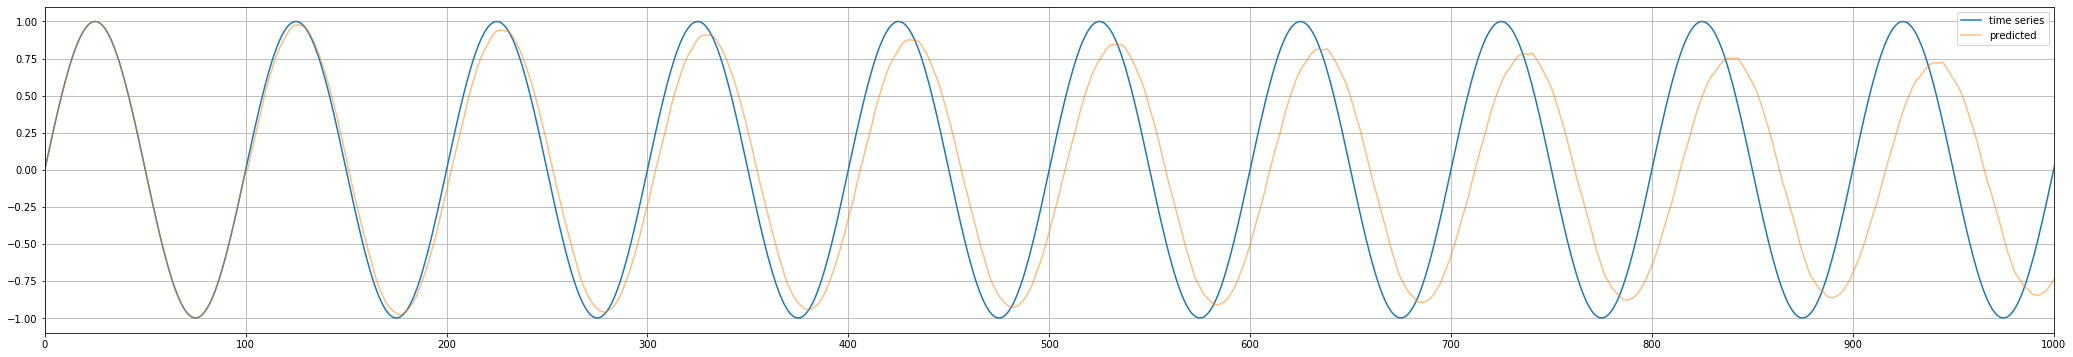

In [0]:
plt.figure(figsize=(36, 6))
times = np.linspace(0, Y_pred.shape[0] - 1, Y_pred.shape[0])
plt.plot(func(times), label="time series")
plt.plot(Y_pred, alpha=0.5, label="predicted")
plt.xticks(np.linspace(0, 1000, 11))
plt.xlim([0, 1000])
plt.grid()
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


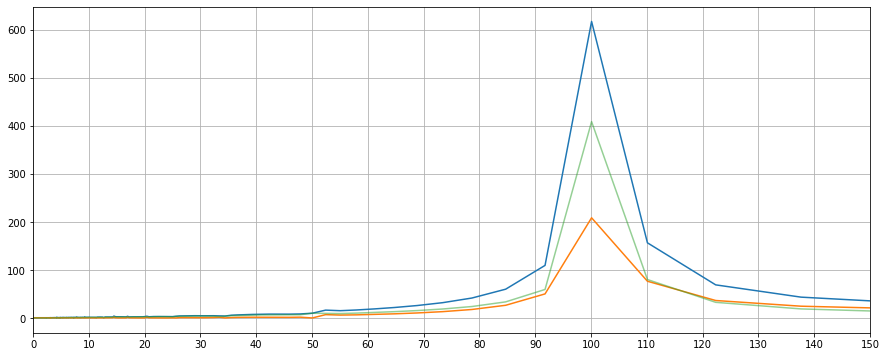

In [0]:
sp = np.fft.fft(Y_pred)
freq = np.fft.fftfreq(times.shape[-1])
plt.figure(figsize=(15, 6))
plt.plot(1/freq, abs(sp.real) + abs(sp.imag))
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

# PyTorch で再帰的ニューラルネットワーク

In [0]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## RNN

In [0]:
import torch
class RNN(torch.nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.l1 = torch.nn.RNN(1, hidden_dim,
                         nonlinearity='tanh',
                         batch_first=True)
        self.l2 = torch.nn.Linear(hidden_dim, 1)
        torch.nn.init.xavier_normal_(self.l1.weight_ih_l0)
        torch.nn.init.orthogonal_(self.l1.weight_hh_l0)

    def forward(self, x):
        h, _ = self.l1(x)
        y = self.l2(h[:, -1])
        return y

## LSTM

In [0]:
import torch
class LSTM(torch.nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.l1 = torch.nn.LSTM(1, hidden_dim, batch_first=True)
        self.l2 = torch.nn.Linear(hidden_dim, 1)
        torch.nn.init.xavier_normal_(self.l1.weight_ih_l0)
        torch.nn.init.orthogonal_(self.l1.weight_hh_l0)

    def forward(self, x):
        h, _ = self.l1(x)
        y = self.l2(h[:, -1])
        return y

## GRU

In [0]:
import torch
class GRU(torch.nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.l1 = torch.nn.GRU(1, hidden_dim, batch_first=True)
        self.l2 = torch.nn.Linear(hidden_dim, 1)
        torch.nn.init.xavier_normal_(self.l1.weight_ih_l0)
        torch.nn.init.orthogonal_(self.l1.weight_hh_l0)

    def forward(self, x):
        h, _ = self.l1(x)
        y = self.l2(h[:, -1])
        return y

## EarlyStopping

In [0]:
def EarlyStopping(log, patience=10):
    if len(log) <= patience:
        return False
    min1 = log[:len(log)-patience].min()
    min2 = log[len(log)-patience:].min()
    if min1 <= min2:
        return True
    else:
        return False

## RNN の実行

In [0]:
%%time
from sklearn.utils import shuffle
model = RNN(50).to(device)
criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, 
                            betas=(0.9, 0.999), amsgrad=True)

epochs = 200
batch_size = 100
n_batches_train = len(X_train) // batch_size - 1
n_batches_test = len(X_val) // batch_size - 1
hist = {'train_loss':[], 'val_loss':[]}

for epoch in range(epochs):
    train_loss = 0.
    val_loss = 0.
    X_, Y_ = shuffle(X_train, Y_train)

    for batch in range(n_batches_train):
        start = batch * batch_size
        end = start + batch_size
        X = torch.Tensor(X_[start:end])
        Y = torch.Tensor(Y_[start:end])
        model.train()
        Y_pred = model(X)
        loss = criterion(Y, Y_pred)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    for batch in range(n_batches_test):
        start = batch * batch_size
        end = start + batch_size
        X = torch.Tensor(X_val[start:end])
        Y = torch.Tensor(Y_val[start:end])
        model.eval()
        Y_pred = model(X)
        loss = criterion(Y, Y_pred)
        val_loss += loss.item()
    
    train_loss /= n_batches_train
    val_loss /= n_batches_test
    hist['train_loss'].append(train_loss)
    hist['val_loss'].append(val_loss)
    print("Epoch:", epoch + 1, "Train loss:", train_loss, "Val loss:", val_loss)

    if EarlyStopping(np.array(hist['val_loss'])):
        print("Early stopping at epoch", epoch + 1)
        break

Epoch: 1 Train loss: 0.019768811256747145 Val loss: 0.00022398641158360988
Epoch: 2 Train loss: 9.938439451126705e-05 Val loss: 4.4140870159026235e-05
Epoch: 3 Train loss: 3.0296867267819696e-05 Val loss: 2.0752695490955375e-05
Epoch: 4 Train loss: 1.696722844057009e-05 Val loss: 1.3333160495676566e-05
Epoch: 5 Train loss: 1.092843534677694e-05 Val loss: 7.994362022145651e-06
Epoch: 6 Train loss: 7.24182895376147e-06 Val loss: 5.845012310601305e-06
Epoch: 7 Train loss: 5.486673797186552e-06 Val loss: 4.08694131692755e-06
Epoch: 8 Train loss: 3.89307819822977e-06 Val loss: 3.0775286177231465e-06
Epoch: 9 Train loss: 2.8690540614498345e-06 Val loss: 2.5698182071209885e-06
Epoch: 10 Train loss: 2.381926466254159e-06 Val loss: 2.0954366846126504e-06
Epoch: 11 Train loss: 2.0163969294956655e-06 Val loss: 1.8659192164705019e-06
Epoch: 12 Train loss: 1.760824035593545e-06 Val loss: 1.5447897112608189e-06
Epoch: 13 Train loss: 1.5001409066756494e-06 Val loss: 1.7976450408241362e-06
Epoch: 14 T

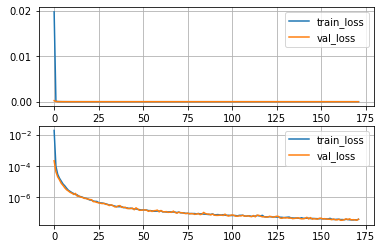

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(211)
plt.plot(hist['train_loss'], label='train_loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(hist['train_loss'], label='train_loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.yscale('log')
plt.legend()
plt.grid()

In [0]:
%%time
total_time_length = 10000
pred_length = 1000
learning_time_length = 100

X_pred_length = np.linspace(0, pred_length , pred_length + 1)
Y_observed = func(X_pred_length)
Y_pred = Y_observed[:learning_time_length+1]

for i in range(pred_length):
    X_ = Y_pred[i:i+learning_time_length+1].reshape(1, learning_time_length + 1, 1)
    Y_ = model(torch.Tensor(X_)).detach().numpy()
    Y_pred = np.append(Y_pred, Y_)

CPU times: user 3.25 s, sys: 6.86 ms, total: 3.25 s
Wall time: 3.26 s


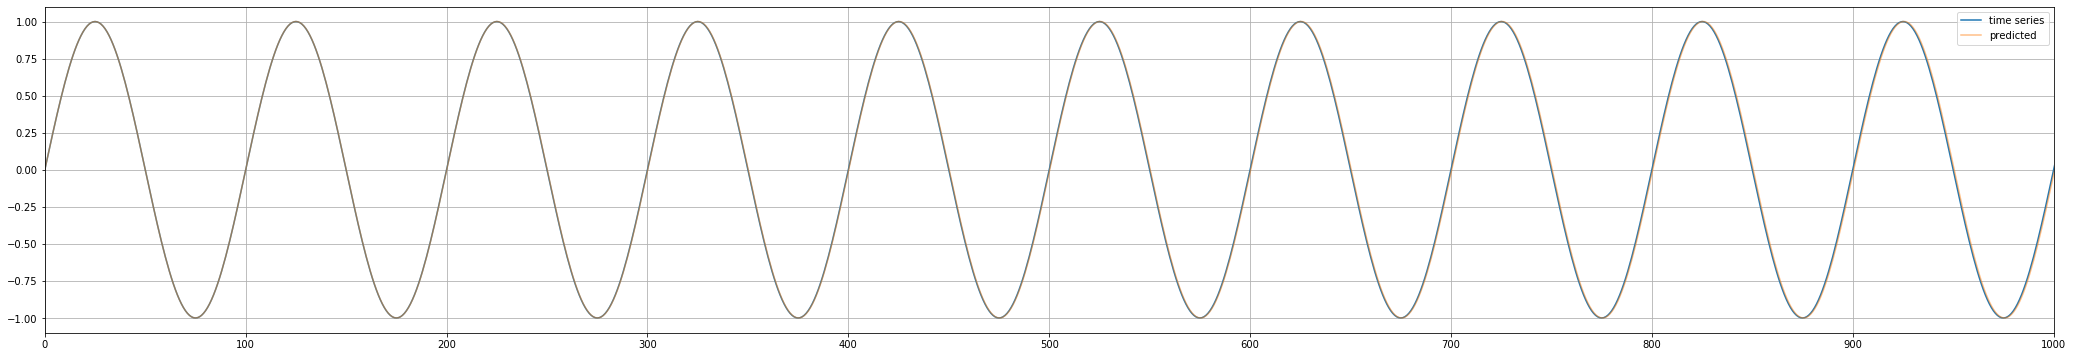

In [0]:
plt.figure(figsize=(36, 6))
times = np.linspace(0, Y_pred.shape[0] - 1, Y_pred.shape[0])
plt.plot(func(times), label="time series")
plt.plot(Y_pred, alpha=0.5, label="predicted")
plt.xticks(np.linspace(0, 1000, 11))
plt.xlim([0, 1000])
plt.grid()
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


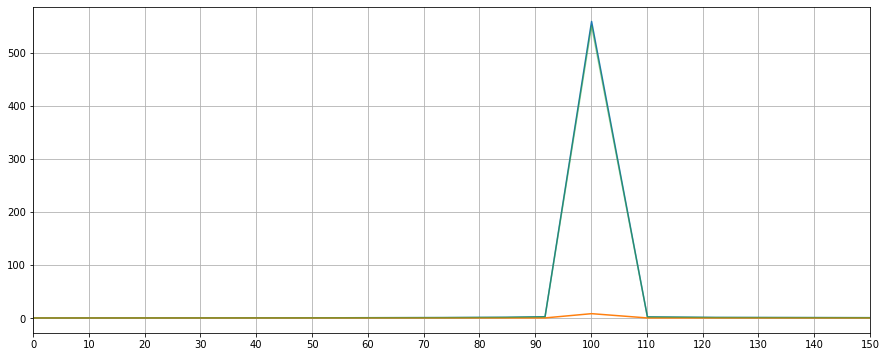

In [0]:
sp = np.fft.fft(Y_pred)
freq = np.fft.fftfreq(times.shape[-1])
plt.figure(figsize=(15, 6))
plt.plot(1/freq, abs(sp.real) + abs(sp.imag))
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

## LSTM の実行

In [0]:
%%time
from sklearn.utils import shuffle
model = LSTM(50).to(device)
criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, 
                            betas=(0.9, 0.999), amsgrad=True)

epochs = 200
batch_size = 100
n_batches_train = len(X_train) // batch_size - 1
n_batches_test = len(X_val) // batch_size - 1
hist = {'train_loss':[], 'val_loss':[]}

for epoch in range(epochs):
    train_loss = 0.
    val_loss = 0.
    X_, Y_ = shuffle(X_train, Y_train)

    for batch in range(n_batches_train):
        start = batch * batch_size
        end = start + batch_size
        X = torch.Tensor(X_[start:end])
        Y = torch.Tensor(Y_[start:end])
        model.train()
        Y_pred = model(X)
        loss = criterion(Y, Y_pred)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    for batch in range(n_batches_test):
        start = batch * batch_size
        end = start + batch_size
        X = torch.Tensor(X_val[start:end])
        Y = torch.Tensor(Y_val[start:end])
        model.eval()
        Y_pred = model(X)
        loss = criterion(Y, Y_pred)
        val_loss += loss.item()
    
    train_loss /= n_batches_train
    val_loss /= n_batches_test
    hist['train_loss'].append(train_loss)
    hist['val_loss'].append(val_loss)
    print("Epoch:", epoch + 1, "Train loss:", train_loss, "Val loss:", val_loss)

    if EarlyStopping(np.array(hist['val_loss'])):
        print("Early stopping at epoch", epoch + 1)
        break

Epoch: 1 Train loss: 0.17846117281199744 Val loss: 0.0027196863666176796
Epoch: 2 Train loss: 0.0005959409876922086 Val loss: 0.0001056938708643429
Epoch: 3 Train loss: 5.0751533448279726e-05 Val loss: 2.4398474124609493e-05
Epoch: 4 Train loss: 1.9299532141303644e-05 Val loss: 1.5142734810069669e-05
Epoch: 5 Train loss: 1.3942784031920988e-05 Val loss: 1.2018903362331912e-05
Epoch: 6 Train loss: 1.1426393892832446e-05 Val loss: 9.783077985048294e-06
Epoch: 7 Train loss: 9.187622574758372e-06 Val loss: 8.261429684353061e-06
Epoch: 8 Train loss: 8.0976997138257e-06 Val loss: 8.043542948144022e-06
Epoch: 9 Train loss: 7.311943340354423e-06 Val loss: 6.983287221373757e-06
Epoch: 10 Train loss: 6.137527273098479e-06 Val loss: 5.798767233500257e-06
Epoch: 11 Train loss: 5.482355630029372e-06 Val loss: 4.771135081682587e-06
Epoch: 12 Train loss: 4.895195653868238e-06 Val loss: 4.45615569333313e-06
Epoch: 13 Train loss: 4.303259763615549e-06 Val loss: 4.397667908051517e-06
Epoch: 14 Train los

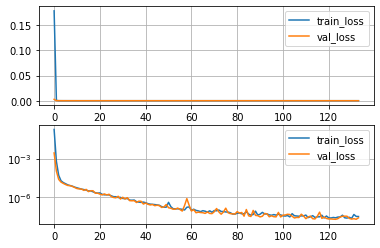

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(211)
plt.plot(hist['train_loss'], label='train_loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(hist['train_loss'], label='train_loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.yscale('log')
plt.legend()
plt.grid()

In [0]:
%%time
total_time_length = 10000
pred_length = 1000
learning_time_length = 100

X_pred_length = np.linspace(0, pred_length , pred_length + 1)
Y_observed = func(X_pred_length)
Y_pred = Y_observed[:learning_time_length+1]

for i in range(pred_length):
    X_ = Y_pred[i:i+learning_time_length+1].reshape(1, learning_time_length + 1, 1)
    Y_ = model(torch.Tensor(X_)).detach().numpy()
    Y_pred = np.append(Y_pred, Y_)

CPU times: user 10 s, sys: 12.2 ms, total: 10 s
Wall time: 10 s


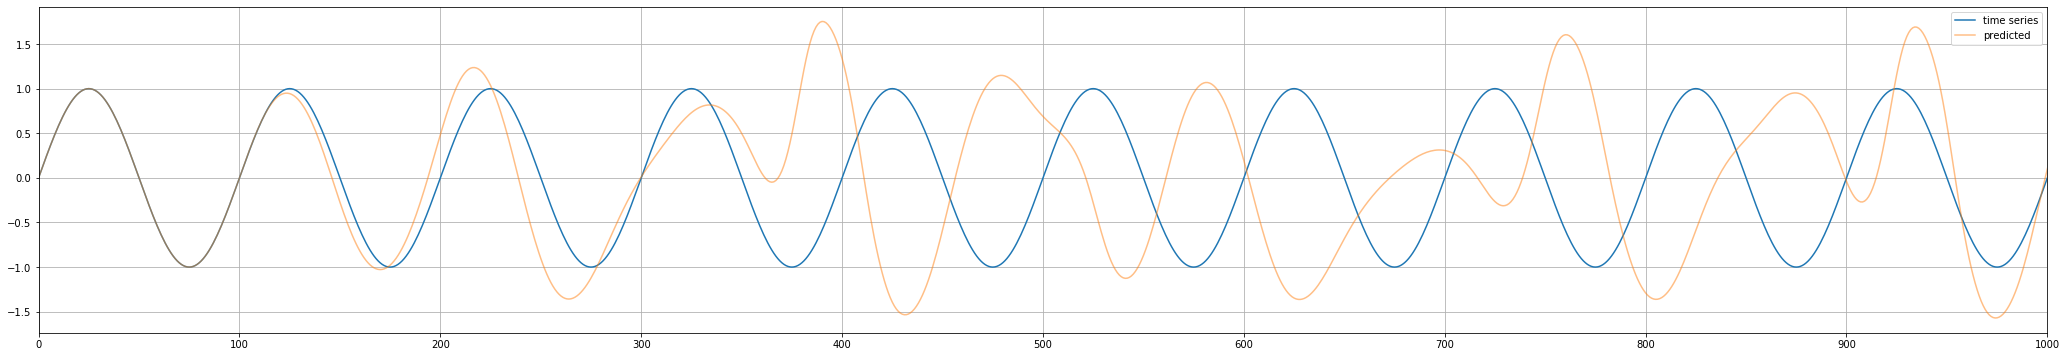

In [0]:
plt.figure(figsize=(36, 6))
times = np.linspace(0, Y_pred.shape[0] - 1, Y_pred.shape[0])
plt.plot(func(times), label="time series")
plt.plot(Y_pred, alpha=0.5, label="predicted")
plt.xticks(np.linspace(0, 1000, 11))
plt.xlim([0, 1000])
plt.grid()
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


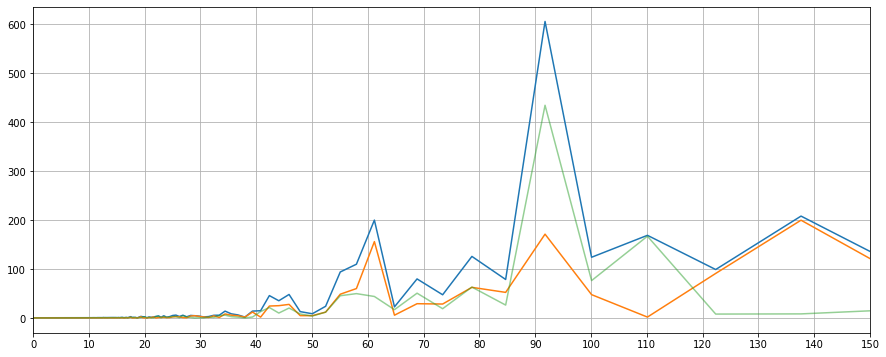

In [0]:
sp = np.fft.fft(Y_pred)
freq = np.fft.fftfreq(times.shape[-1])
plt.figure(figsize=(15, 6))
plt.plot(1/freq, abs(sp.real) + abs(sp.imag))
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

## GRU の実行

In [0]:
%%time
from sklearn.utils import shuffle
model = GRU(50).to(device)
criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, 
                            betas=(0.9, 0.999), amsgrad=True)

epochs = 200
batch_size = 100
n_batches_train = len(X_train) // batch_size - 1
n_batches_test = len(X_val) // batch_size - 1
hist = {'train_loss':[], 'val_loss':[]}

for epoch in range(epochs):
    train_loss = 0.
    val_loss = 0.
    X_, Y_ = shuffle(X_train, Y_train)

    for batch in range(n_batches_train):
        start = batch * batch_size
        end = start + batch_size
        X = torch.Tensor(X_[start:end])
        Y = torch.Tensor(Y_[start:end])
        model.train()
        Y_pred = model(X)
        loss = criterion(Y, Y_pred)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    for batch in range(n_batches_test):
        start = batch * batch_size
        end = start + batch_size
        X = torch.Tensor(X_val[start:end])
        Y = torch.Tensor(Y_val[start:end])
        model.eval()
        Y_pred = model(X)
        loss = criterion(Y, Y_pred)
        val_loss += loss.item()
    
    train_loss /= n_batches_train
    val_loss /= n_batches_test
    hist['train_loss'].append(train_loss)
    hist['val_loss'].append(val_loss)
    print("Epoch:", epoch + 1, "Train loss:", train_loss, "Val loss:", val_loss)

    if EarlyStopping(np.array(hist['val_loss'])):
        print("Early stopping at epoch", epoch + 1)
        break

Epoch: 1 Train loss: 0.10608885767989051 Val loss: 0.0109359510242939
Epoch: 2 Train loss: 0.003994891539780208 Val loss: 0.00015183229697868228
Epoch: 3 Train loss: 6.0235604252785634e-05 Val loss: 4.553866165224463e-05
Epoch: 4 Train loss: 4.28452416926097e-05 Val loss: 3.958534944104031e-05
Epoch: 5 Train loss: 3.731780116840337e-05 Val loss: 3.446391929173842e-05
Epoch: 6 Train loss: 3.2597196504633386e-05 Val loss: 2.946705717477016e-05
Epoch: 7 Train loss: 2.7588262291362462e-05 Val loss: 2.494240652595181e-05
Epoch: 8 Train loss: 2.3096051639489208e-05 Val loss: 2.152119850507006e-05
Epoch: 9 Train loss: 1.941091406292682e-05 Val loss: 1.7324080545222387e-05
Epoch: 10 Train loss: 1.5782136473810682e-05 Val loss: 1.365230400551809e-05
Epoch: 11 Train loss: 1.2602193074156112e-05 Val loss: 1.1405657460272778e-05
Epoch: 12 Train loss: 1.0376301781014683e-05 Val loss: 9.209654308506288e-06
Epoch: 13 Train loss: 8.430867311313379e-06 Val loss: 8.678392077854369e-06
Epoch: 14 Train lo

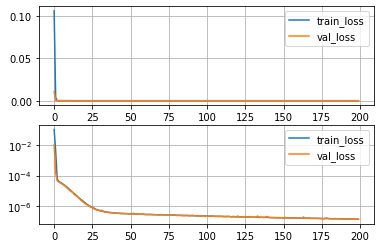

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(211)
plt.plot(hist['train_loss'], label='train_loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(hist['train_loss'], label='train_loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.yscale('log')
plt.legend()
plt.grid()

In [0]:
%%time
total_time_length = 10000
pred_length = 1000
learning_time_length = 100

X_pred_length = np.linspace(0, pred_length , pred_length + 1)
Y_observed = func(X_pred_length)
Y_pred = Y_observed[:learning_time_length+1]

for i in range(pred_length):
    X_ = Y_pred[i:i+learning_time_length+1].reshape(1, learning_time_length + 1, 1)
    Y_ = model(torch.Tensor(X_)).detach().numpy()
    Y_pred = np.append(Y_pred, Y_)

CPU times: user 11 s, sys: 11 ms, total: 11 s
Wall time: 11 s


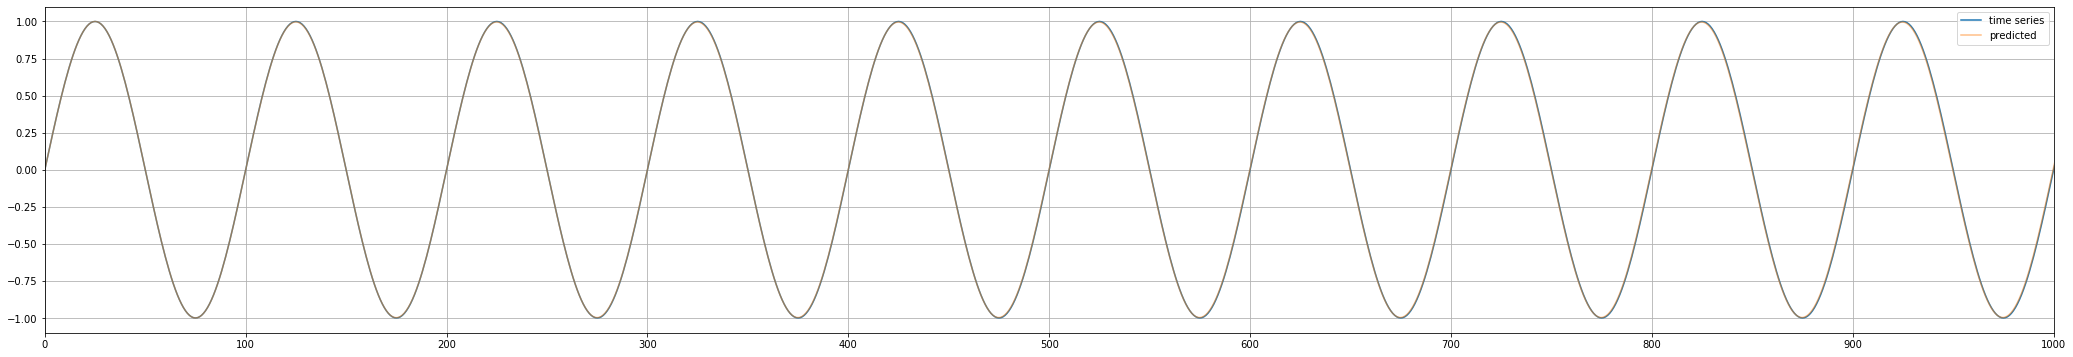

In [0]:
plt.figure(figsize=(36, 6))
times = np.linspace(0, Y_pred.shape[0] - 1, Y_pred.shape[0])
plt.plot(func(times), label="time series")
plt.plot(Y_pred, alpha=0.5, label="predicted")
plt.xticks(np.linspace(0, 1000, 11))
plt.xlim([0, 1000])
plt.grid()
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


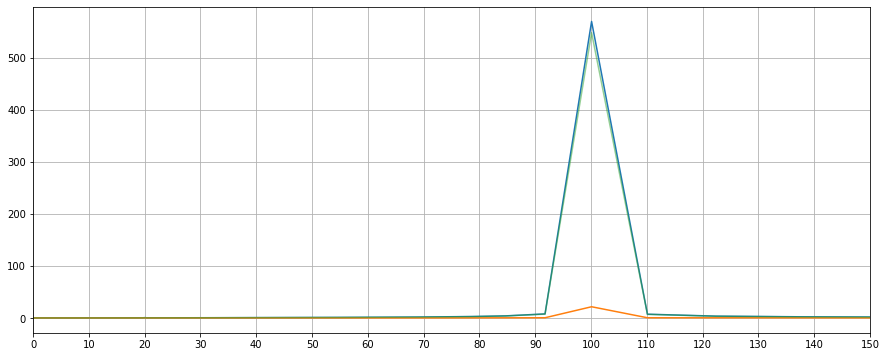

In [0]:
sp = np.fft.fft(Y_pred)
freq = np.fft.fftfreq(times.shape[-1])
plt.figure(figsize=(15, 6))
plt.plot(1/freq, abs(sp.real) + abs(sp.imag))
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()